In [80]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cd foodb_jan_23_2014.csv/


/Users/Lin/Dropbox/Data science/Fun DS projects/Food_DB/foodb_jan_23_2014.csv


In [7]:
foods = pd.read_csv("foods.csv", error_bad_lines=False)

Skipping line 282: expected 18 fields, saw 26
Skipping line 726: expected 18 fields, saw 32
Skipping line 728: expected 18 fields, saw 19
Skipping line 729: expected 18 fields, saw 22
Skipping line 730: expected 18 fields, saw 26
Skipping line 732: expected 18 fields, saw 25
Skipping line 734: expected 18 fields, saw 27
Skipping line 737: expected 18 fields, saw 19
Skipping line 749: expected 18 fields, saw 19
Skipping line 766: expected 18 fields, saw 19
Skipping line 782: expected 18 fields, saw 21
Skipping line 795: expected 18 fields, saw 19
Skipping line 823: expected 18 fields, saw 31
Skipping line 825: expected 18 fields, saw 22
Skipping line 843: expected 18 fields, saw 22



In [8]:
foods.head()

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,legacy_id,food_group,food_subgroup,food_type,created_at,updated_at,creator_id,updater_id
0,1,Angelica,Angelica keiskei,NaN,NaN,NaN,1.jpg,image/jpeg,111325,2012-04-20 09:29:57,1,Herbs and Spices,Herbs,Type 1,2011-02-09 00:37:14,2012-04-20 16:29:57,NaN,2
1,2,Savoy cabbage,Brassica oleracea var. sabauda,NaN,NaN,NaN,2.jpg,image/jpeg,155178,2012-04-20 09:39:54,2,Vegetables,Cabbages,Type 1,2011-02-09 00:37:15,2012-04-20 16:39:55,NaN,NaN
2,3,Silver linden,Tilia argentea,NaN,NaN,NaN,3.jpg,image/jpeg,56367,2012-04-20 09:41:25,3,Herbs and Spices,Herbs,Type 1,2011-02-09 00:37:15,2012-04-20 16:41:26,NaN,NaN
3,4,Kiwi,Actinidia chinensis,NaN,506775,NaN,4.jpg,image/jpeg,110661,2012-04-20 09:32:21,4,Fruits,Tropical fruits,Type 1,2011-02-09 00:37:15,2012-04-20 16:32:22,NaN,NaN
4,5,Allium (Onion),Allium,NaN,42634,NaN,5.jpg,image/jpeg,341911,2012-04-20 09:37:44,5,Vegetables,Onion-family vegetables,Type 1,2011-02-09 00:37:15,2012-04-20 16:37:45,NaN,NaN


In [11]:
len(foods)

878

In [13]:
foods.food_group.unique()

array(['Herbs and Spices', 'Vegetables', 'Fruits', 'Nuts',
       'Cereals and cereal products', 'Pulses', 'Teas', nan,
       '2011-02-09 00:37:17', 'Gourds', 'Coffee and coffee products',
       'Soy', 'Cocoa and cocoa products', '2011-02-09 00:37:27',
       'Beverages', 'Aquatic foods', 'Animal foods', '2011-02-09 00:37:41',
       'Milk and milk products', 'Eggs', 'Confectioneries', 'Baking goods',
       'Dishes', 'Snack foods', 'Baby foods', 'Unclassified',
       'Fats and oils', '2012-01-10 02:28:37'], dtype=object)

In [32]:
valid_foods = ['Herbs and Spices', 'Vegetables', 'Fruits', 'Nuts',
       'Cereals and cereal products', 'Pulses', 'Teas'
       , 'Gourds', 'Coffee and coffee products',
       'Soy', 'Cocoa and cocoa products',
       'Beverages', 'Aquatic foods', 'Animal foods',
       'Milk and milk products', 'Eggs', 'Confectioneries', 'Baking goods',
       'Dishes', 'Snack foods', 'Baby foods', 'Unclassified','Fats and oils']

In [33]:
#there's some mess in this file; it needs to be cleaed up to get rid of the rows that are errors
#doesn't seem to be too many of them.
foods["food_group"][~foods["food_group"].isin(valid_foods)]

39                     NaN
40     2011-02-09 00:37:17
231                    NaN
232    2011-02-09 00:37:27
233                    NaN
234    2011-02-09 00:37:27
436                    NaN
437    2011-02-09 00:37:41
851                    NaN
852    2012-01-10 02:28:37
Name: food_group, dtype: object

In [35]:
foods = foods[foods["food_group"].isin(valid_foods)]

In [36]:
foods["food_group"][~foods["food_group"].isin(valid_foods)]

Series([], Name: food_group, dtype: object)

In [55]:
foods["name_scientific"][30:50]

30      Brassica oleracea var. botrytis
31     Brassica oleracea var. gemmifera
32    Brassica oleracea var. gongylodes
33       Brassica oleracea var. italica
34                        Brassica rapa
35              Brassica rapa var. rapa
36                        Cajanus cajan
37                    Camellia sinensis
38                     Capparis spinosa
41                        Carica papaya
42                 Carthamus tinctorius
43                          Carum carvi
44                  Carya illinoinensis
45                             Castanea
46                   Chamaemelum nobile
47                      Cicer arietinum
48                    Cichorium endivia
49                    Cichorium intybus
50                Cinnamomum aromaticum
51                     Cinnamomum verum
Name: name_scientific, dtype: object

In [63]:
for i in foods["name_scientific"].dropna():
    #if type(i) == 'float':
        print i

Angelica keiskei
Brassica oleracea var. sabauda
Tilia argentea
Actinidia chinensis
Allium
Allium cepa
Allium porrum
Allium sativum
Allium schoenoprasum
Aloysia triphylla
Anacardium occidentale
Ananas comosus
Anethum graveolens
Annona reticulata
Apium graveolens
Arachis hypogaea
Arctium lappa
Armoracia rusticana
Artemisia dracunculus
Artemisia vulgaris
Asparagus officinalis
Avena sativa
Averrhoa carambola
Bertholletia excelsa
Beta vulgaris
Borago officinalis
Brassica juncea
Brassica napus
Brassica napus var. napus
Brassica oleracea
Brassica oleracea var. botrytis
Brassica oleracea var. gemmifera
Brassica oleracea var. gongylodes
Brassica oleracea var. italica
Brassica rapa
Brassica rapa var. rapa
Cajanus cajan
Camellia sinensis
Capparis spinosa
Carica papaya
Carthamus tinctorius
Carum carvi
Carya illinoinensis
Castanea
Chamaemelum nobile
Cicer arietinum
Cichorium endivia
Cichorium intybus
Cinnamomum aromaticum
Cinnamomum verum
Citrullus lanatus
Citrus aurantiifolia
Citrus limon
Citrus m

In [60]:
type(foods["name_scientific"][50])

str

In [46]:
def genus (name):
    
    try:
        name.split()[0]
    except: 
foods["name_scientific"].apply(genus)

AttributeError: 'float' object has no attribute 'split'

In [65]:
foods['Genus'] = foods["name_scientific"].dropna().apply(lambda x: x.split()[0])

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
foods.Genus.describe()

count          627
unique         415
top       Brassica
freq            23
Name: Genus, dtype: object

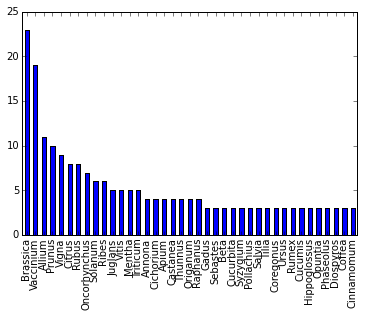

In [85]:
foods.Genus.value_counts()[foods.Genus.value_counts()>2].plot(kind='bar')